#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing
### Image loading from directory function in keras

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Data_set/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Data_set/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 898s 9s/step - accuracy: 0.0302 - loss: 15.9800 - val_accuracy: 0.0256 - val_loss: 3.5835
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 892ms/step - accuracy: 0.0320 - loss: 3.5822 - val_accuracy: 0.0313 - val_loss: 3.5814
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 852ms/step - accuracy: 0.0381 - loss: 3.5724 - val_accuracy: 0.0313 - val_loss: 3.5815
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 821ms/step - accuracy: 0.0437 - loss: 3.5462 - val_accuracy: 0.0883 - val_loss: 3.3409
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 86s 865ms/step - accuracy: 0.0706 - loss: 3.3799 - val_accuracy: 0.1254 - val_loss: 3.1814
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 850ms/step - accuracy: 0.0793 - loss: 3.2299 - val_accuracy: 0.1481 - val_loss: 2.9834
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 897ms/step - accuracy: 0.0823 - loss: 3.1952 - val_accuracy: 0.2564 - val_loss: 2.7096
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 859ms/step - accuracy: 0.1439 - loss: 3.0043 - val_a

##Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 488ms/step - accuracy: 0.9435 - loss: 0.2018
Training accuracy: 0.9489566683769226


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 541ms/step - accuracy: 0.9510 - loss: 0.4099
Validation accuracy: 0.945868968963623


##Saving Model

In [32]:
cnn.save('/content/drive/MyDrive/trained_model.keras')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.0272873193025589,
  0.02792937308549881,
  0.04077046364545822,
  0.05489566549658775,
  0.07512038201093674,
  0.08057785034179688,
  0.0969502404332161,
  0.15409310162067413,
  0.20224718749523163,
  0.23434992134571075,
  0.2898876368999481,
  0.3418940603733063,
  0.4077046513557434,
  0.4609951972961426,
  0.5319421887397766,
  0.5585874915122986,
  0.5996789932250977,
  0.6532905101776123,
  0.6805778741836548,
  0.7097913026809692,
  0.7386837601661682,
  0.7258427143096924,
  0.7637239098548889,
  0.7874799370765686,
  0.8125200867652893,
  0.8237560391426086,
  0.8250401020050049,
  0.841091513633728,
  0.843338668346405,
  0.8500802516937256,
  0.8654895424842834,
  0.8898876309394836],
 'loss': [6.713467597961426,
  3.5823564529418945,
  3.565941333770752,
  3.498795747756958,
  3.3475394248962402,
  3.2288601398468018,
  3.1373231410980225,
  2.9458413124084473,
  2.763597011566162,
  2.6323957443237305,
  2.4429211616516113,
  2.271460771560669,
  2.052400

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 96.29629850387573 %


#Accuracy Visualization

##Training Visualization

In [ ]:
# training_history.history['accuracy']

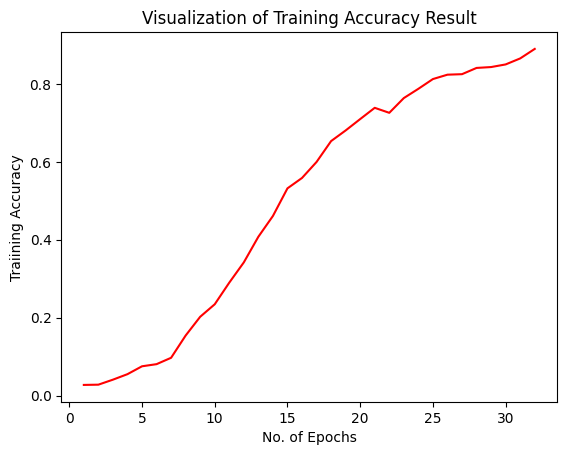

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

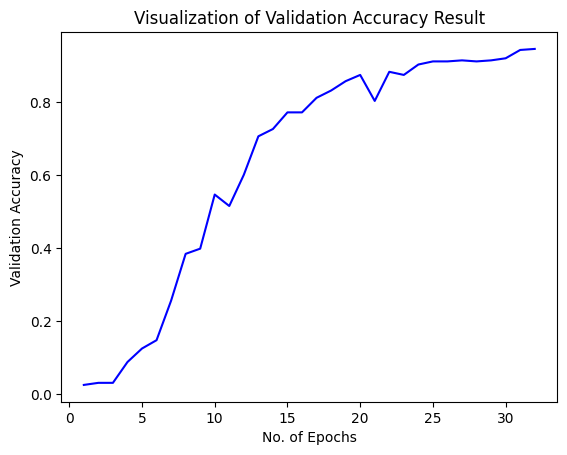

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Data_set/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 86s 7s/step - accuracy: 0.9491 - loss: 0.4866
Test accuracy: 0.9470751881599426
